In [1]:
# importing the needed libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# part I: finding the most probable and uncertainty values
measures=np.array([9.0,4.3,8.2,9.5,6.4,10.4,8.1,7.3,10.6,6.0])
mpv=measures.sum()/measures.size
stdErr=np.sqrt(np.sum((measures-mpv)**2)/(measures.size-1))
print('Most probable value:',mpv)
print('Uncertainty:',stdErr)

Most probable value: 7.9799999999999995
Uncertainty: 2.0153852678279103


Text(0, 0.5, 'luminosity')

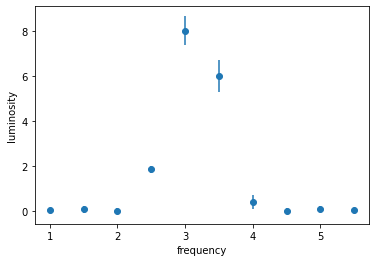

In [3]:
# part II: best parameters and uncertainties
# first I create the arrays of frequency, data, and uncertainties. 
# I use the results of part I for the missing data
freq=np.array([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5])
meas=np.array([0.05,0.1,.0075,1.86,8.0,6.0,.41,.03,0.1,.05])
errs=np.array([.1,.15,.12,.17,.64,.72,.3,.1,.13,.11])
# plotting the result
plt.errorbar(freq,meas,yerr=errs,marker='o',ls='None',label='Data')
plt.xlabel('frequency')
plt.ylabel('luminosity')

In [4]:
# set up my guess parameter values and a matrix to store the chi^2 results
nu0Guess=np.arange(2.5,3.50001,.01)
deltaGuess=np.arange(.25,.400001,.001)
chisq=np.zeros([nu0Guess.size,deltaGuess.size])
print('These are the sizes of the guess arrays:',chisq.shape)

These are the sizes of the guess arrays: (101, 151)


In [5]:
# double loop over all the guess value pairs.
chimin=1e100
for inu in range(nu0Guess.size):
    for ide in range(deltaGuess.size):
        # first compute the model for the given parameter set
        model=10*np.exp(-(freq-nu0Guess[inu])**2/2/deltaGuess[ide]**2)
        # then compute the chi^2 value and store it
        thisChi=np.sum((model-meas)**2/errs**2)
        # check if this is the best chi^2 so far and, if true, save the parameter
        # values and the model for later use
        chisq[inu,ide]=thisChi
        if thisChi < chimin:
            chimin=thisChi
            nu0Best=nu0Guess[inu]
            deltaBest=deltaGuess[ide]
            bestModel=model    

In [6]:
# Cheching if the model and the data agree
print('chimin compared to number of data',chimin,meas.size)
print('The best value of the central frequency is:',nu0Best)
print('The best value of the width is:',deltaBest)
if chimin<(2*meas.size):
    print()
    print('SUCCESS!! You found a viable model')
    print()
else:
    print('No luck!, change model')

chimin compared to number of data 5.061721789417155 10
The best value of the central frequency is: 3.149999999999986
The best value of the width is: 0.3510000000000001

SUCCESS!! You found a viable model



Text(0, 0.5, '$\\Delta_{\\nu}$')

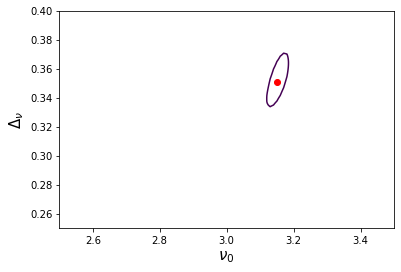

In [9]:
# plotting the uncertainty area for the parameters. 
# Best value shown as a red dot, 1-sigma uncertainty area
# shown with a contour ellipse
plt.contour(nu0Guess,deltaGuess,np.transpose(chisq),[chisq.min()+2.3])
plt.plot(nu0Best,deltaBest,'ro')
plt.xlabel(r'$\nu_0$',fontsize=15)
plt.ylabel(r'$\Delta_{\nu}$',fontsize=15)

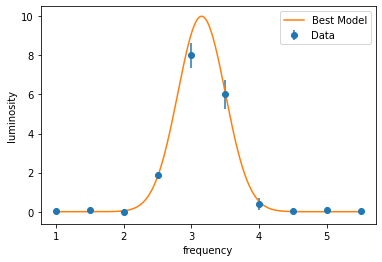

In [10]:
# plotting my best model on top of the data for visual satisfaction
plt.errorbar(freq,meas,yerr=errs,marker='o',ls='None',label='Data')
ff=np.arange(1,5.5,.001)
mm=10*np.exp(-(ff-nu0Best)**2/2/deltaBest**2)
plt.xlabel('frequency')
plt.ylabel('luminosity')
plt.plot(ff,mm,label='Best Model')
plt.legend()